## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mdat_df = pd.DataFrame(mouse_metadata)
results_df = pd.DataFrame(study_results)
# Display the data table for preview
combo_df = pd.merge(mdat_df, results_df, how='inner', on='Mouse ID')
combo_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_mice = combo_df['Mouse ID'].nunique()
print(num_mice)

249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_Mouse = combo_df.loc[combo_df.duplicated(subset = ['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
dup_Mouse

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_Mouse_df = combo_df.loc[combo_df['Mouse ID'] == 'g989',:]
dup_Mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combo_df = combo_df[combo_df['Mouse ID'].str.contains('g989')==False]
clean_combo_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice_new = clean_combo_df['Mouse ID'].nunique()
print(num_mice_new)

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = clean_combo_df['Tumor Volume (mm3)'].groupby(clean_combo_df['Drug Regimen']).mean()
median = clean_combo_df['Tumor Volume (mm3)'].groupby(clean_combo_df['Drug Regimen']).median()
var = clean_combo_df['Tumor Volume (mm3)'].groupby(clean_combo_df['Drug Regimen']).var()
std = clean_combo_df['Tumor Volume (mm3)'].groupby(clean_combo_df['Drug Regimen']).std()
sem = clean_combo_df['Tumor Volume (mm3)'].groupby(clean_combo_df['Drug Regimen']).sem()

summary_table = pd.DataFrame({'Mean Tumor Vol. (mm3)': mean, 'Median Tumor Vol. (mm3)': median, 'Tumor Vol. Variance (mm3)': var, 
                              'Tumor Vol Standard Dev.(mm3)': std, 'Tumor Vol. Standard Error': sem})
summary_table
                                              
                              

,Mean Tumor Vol. (mm3),Median Tumor Vol. (mm3),Tumor Vol. Variance (mm3),Tumor Vol Standard Dev.(mm3),Tumor Vol. Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

one_sum_table = clean_combo_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
one_sum_table



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

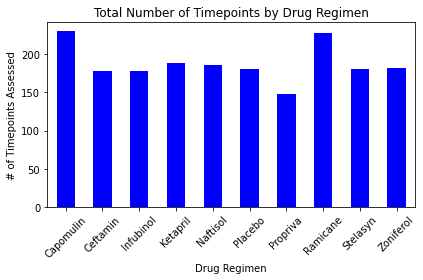

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

grouped = clean_combo_df.groupby('Drug Regimen')
timepoints = grouped.count()['Timepoint']

barplot = timepoints.plot.bar(color='b', rot=45)
plt.xlabel("Drug Regimen", fontsize=10)
plt.ylabel("# of Timepoints Assessed", fontsize=10)
plt.title("Total Number of Timepoints by Drug Regimen", fontsize=12)
plt.tight_layout()
plt.show()



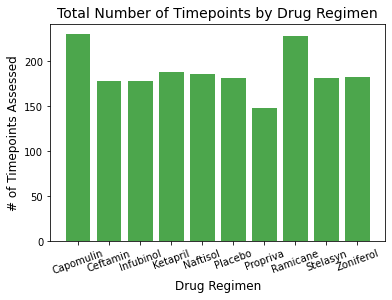

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
xvals = timepoints.index.values
yvals = timepoints.values

plt.bar(xvals, yvals, color='g', alpha=0.7, align='center')
plt.xticks(rotation=20)
plt.title('Total Number of Timepoints by Drug Regimen', fontsize=14)
plt.xlabel('Drug Regimen', fontsize=12)
plt.ylabel('# of Timepoints Assessed', fontsize=12)


plt.show()

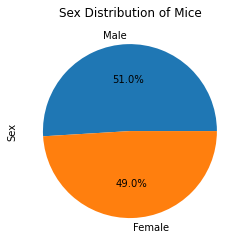

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gendered = clean_combo_df['Sex'].value_counts()
gendered.plot.pie(autopct='%1.1f%%')
plt.title("Sex Distribution of Mice")

plt.show()


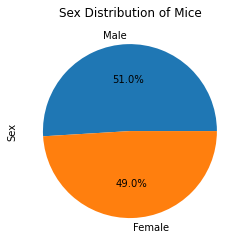

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = [(gendered[0]/gendered.sum()),(gendered[1]/gendered.sum())]
labels = ['Male', 'Female']
sizes = genders

pie = gendered.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Sex Distribution of Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_vol = clean_combo_df[clean_combo_df['Drug Regimen'].isin(drugs)]

# Start by getting the last (greatest) timepoint for each mouse
finaltime_grouped = final_vol.groupby(['Mouse ID'])
finaltime = finaltime_grouped['Timepoint'].max().to_frame(name = 'Timepoint')

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_vol = pd.merge(final_vol, finaltime, on = ["Mouse ID", "Timepoint"], how = "right")
final_vol.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a275,Ceftamin,Female,20,28,45,62.999356,3
3,a411,Ramicane,Male,3,22,45,38.407618,1
4,a444,Ramicane,Female,10,25,45,43.047543,0


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

for drug in drugs:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_tumors = final_vol[ final_vol['Drug Regimen'] == drug ]
    drug_vol =  drug_tumors['Tumor Volume (mm3)']
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    Q1 = drug_vol.quantile(0.25)
    Q3 = drug_vol.quantile(0.75)
    IQR = round(Q3 - Q1, 5)
    print(f"Q1 = {Q1}")
    print(f"Q3 = {Q3}")
    print(f"IQR = {IQR}")
    
    # Determine outliers using upper and lower bounds
    drug_outliers = drug_vol.loc[(drug_vol < Q1) | (drug_vol > Q3)]
        
    # add subset 
    tumor_vol.append(drug_vol.tolist())
    
    print(f"Potential outliers in {drug}:\n{drug_outliers}")

Q1 = 37.685932865
Q3 = 45.0
IQR = 7.31407
Potential outliers in Capomulin:
12      37.614948
14      36.866876
15      33.949940
16      32.959671
17      28.328531
          ...    
439     46.821070
440     47.685963
1453    45.597064
1454    46.059608
1455    46.539206
Name: Tumor Volume (mm3), Length: 100, dtype: float64
Q1 = 36.674634585
Q3 = 45.0
IQR = 8.32537
Potential outliers in Ramicane:
2      35.014271
3      34.223992
4      32.997729
5      33.464577
6      31.099498
         ...    
412    45.766111
420    45.220869
442    45.568211
451    45.877545
452    46.378092
Name: Tumor Volume (mm3), Length: 91, dtype: float64
Q1 = 47.3123533
Q3 = 57.314443967500004
IQR = 10.00209
Potential outliers in Infubinol:
454     45.000000
460     59.523197
461     61.931650
462     63.593490
463     67.973419
          ...    
1813    67.685569
1863    45.000000
1870    58.628399
1871    60.053740
1872    62.754451
Name: Tumor Volume (mm3), Length: 90, dtype: float64
Q1 = 47.2084271125
Q

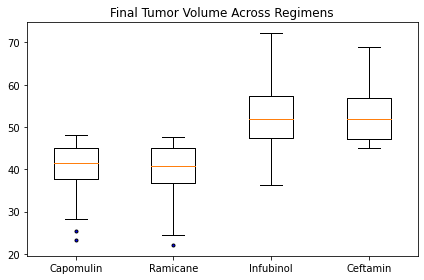

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
blue_circle = dict(markerfacecolor='b', marker='.')
fig, ax = plt.subplots()
ax.set_title('Final Tumor Volume Across Regimens')
ax.boxplot(tumor_vol, flierprops = blue_circle)
plt.xticks(ticks = range(1,5), labels = drugs)
plt.tight_layout()
plt.show()

## Line and Scatter Plots

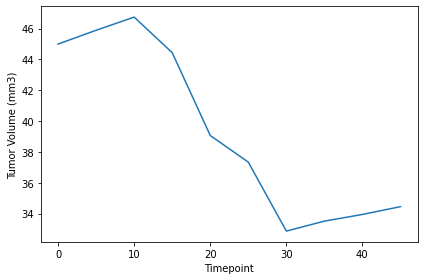

In [26]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capdf = combo_df.loc[combo_df['Drug Regimen'] == 'Capomulin']
capdf.sample(1) ##returned mouse ID t565

mouse = clean_combo_df.loc[clean_combo_df['Mouse ID'] == 't565']
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.tight_layout()
plt.show()


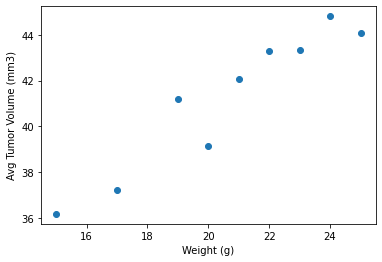

In [30]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capgroupdf = capdf.groupby("Weight (g)")
avg_volume = capgroupdf.mean("Tumor Volume (mm3)")
plt.scatter(avg_volume.index, avg_volume['Tumor Volume (mm3)'])
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
